# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64
import sys

try:
    import cv2
    _HAS_CV2 = True
except Exception:
    _HAS_CV2 = False
    print("cv2 not available — cvtColor comparison will be skipped.", file=sys.stderr)

def show(img, title=None, cmap=None, vmin=None, vmax=None):
    plt.figure(figsize=(6,5))
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap if cmap else 'gray', vmin=vmin, vmax=vmax)
    else:
        # assume RGB
        plt.imshow(img.astype(np.uint8))
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Normalizing to 0-255 uint8 for display / saving
def to_uint8(img):
    mi, ma = np.min(img), np.max(img)
    if ma == mi:
        return np.zeros_like(img, dtype=np.uint8)
    out = (img - mi) / (ma - mi) * 255.0
    return out.astype(np.uint8)


In [19]:
IMAGE_PATH = "/content/Apple.54.21.jpeg"

def load_image():
    if IMAGE_PATH and IMAGE_PATH.strip():
        try:
            img = Image.open(IMAGE_PATH).convert("RGB")
            print(f"Loaded image from path: {IMAGE_PATH}")
            return np.array(img)
        except Exception as e:
            print("Failed to load from IMAGE_PATH:", e, file=sys.stderr)

rgb = load_image()  # shape: (H, W, 3), values 0-255
print("RGB array dtype:", rgb.dtype, "shape:", rgb.shape)


Loaded image from path: /content/Apple.54.21.jpeg
RGB array dtype: uint8 shape: (1000, 998, 3)


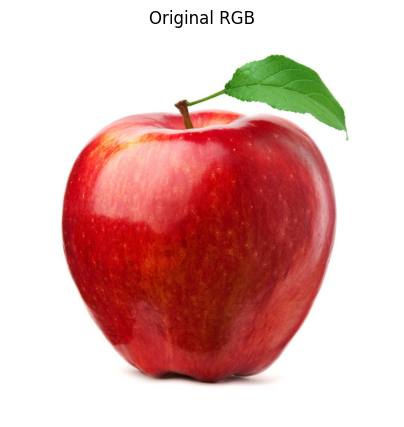

In [20]:
# 1)Original RGB
show(rgb, title="Original RGB")

In [6]:
# 2) Grayscale by weighted sum (NumPy) using standard luminance weights
#    Gray = 0.2989*R + 0.5870*G + 0.1140*B
rgb_float = rgb.astype(np.float32)
weights = np.array([0.2989, 0.5870, 0.1140], dtype=np.float32)
gray_numpy = np.dot(rgb_float, weights)   # shape (H, W)

print("Grayscale (NumPy) shape:", gray_numpy.shape, "dtype:", gray_numpy.dtype)


Grayscale (NumPy) shape: (1000, 998) dtype: float32


In [7]:
# 3) Grayscale with cv2.cvtColor (for comparison) if cv2 available
if _HAS_CV2:

    gray_cv2 = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY).astype(np.float32)
    print("Grayscale (cv2) shape:", gray_cv2.shape, "dtype:", gray_cv2.dtype)
else:
    gray_cv2 = None

Grayscale (cv2) shape: (1000, 998) dtype: float32


In [8]:
# 4) Showing and comparing a few pixel values
h, w = gray_numpy.shape
sample_coords = [(0,0), (h//2, w//2), (h-1, w-1)]
print("\nSample pixel values (R,G,B) and grayscale:")
for (r,c) in sample_coords:
    rbg_pixel = rgb[r,c]
    print(f"pixel ({r},{c}) RGB:", rbg_pixel, " -> gray_numpy:", gray_numpy[r,c],
          " -> gray_cv2:" , (gray_cv2[r,c] if gray_cv2 is not None else "N/A"))



Sample pixel values (R,G,B) and grayscale:
pixel (0,0) RGB: [255 255 255]  -> gray_numpy: 254.9745  -> gray_cv2: 255.0
pixel (500,499) RGB: [154  10   9]  -> gray_numpy: 52.9266  -> gray_cv2: 53.0
pixel (999,997) RGB: [255 255 255]  -> gray_numpy: 254.9745  -> gray_cv2: 255.0


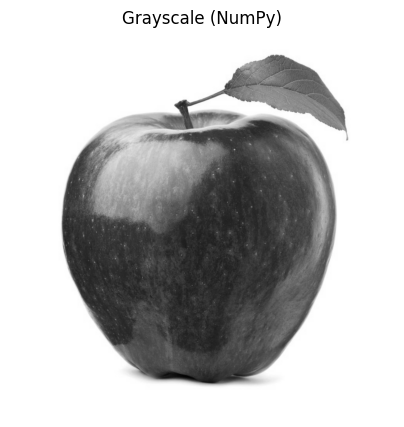

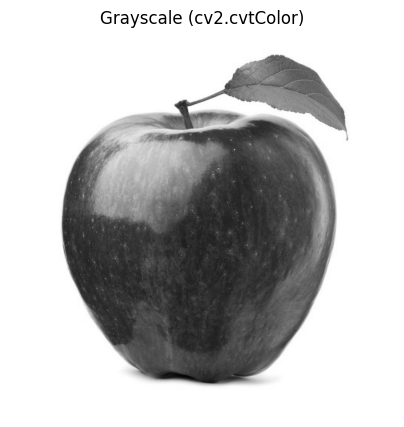

In [9]:
# Displaying grayscale images
show(to_uint8(gray_numpy), title="Grayscale (NumPy)")

if gray_cv2 is not None:
    show(to_uint8(gray_cv2), title="Grayscale (cv2.cvtColor)")

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [10]:

img = gray_numpy

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
print("\nFFT computed. fshift shape:", fshift.shape)


FFT computed. fshift shape: (1000, 998)


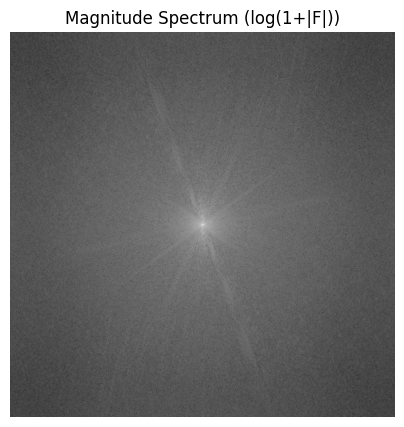

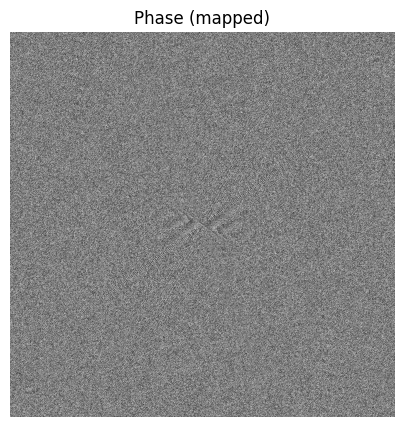

In [11]:

magnitude = np.abs(fshift)
phase = np.angle(fshift)

magnitude_spectrum = np.log1p(magnitude)

show(to_uint8(magnitude_spectrum), title="Magnitude Spectrum (log(1+|F|))")

phase_mapped = ((phase + np.pi) / (2*np.pi) * 255.0)
show(phase_mapped.astype(np.uint8), title="Phase (mapped)")


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Reconstructed with LPF radius 10: min=32.28, max=277.02
Reconstructed with LPF radius 30: min=26.21, max=280.03
Reconstructed with LPF radius 80: min=10.76, max=289.53


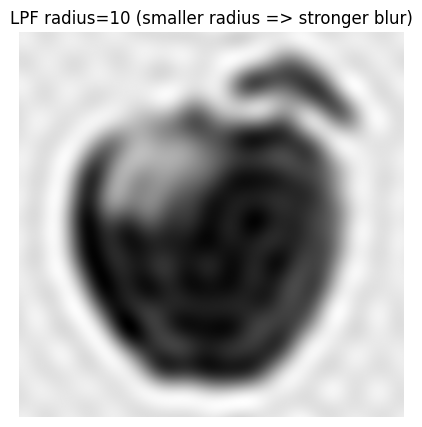

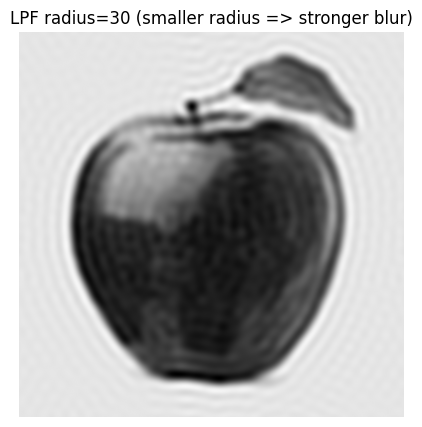

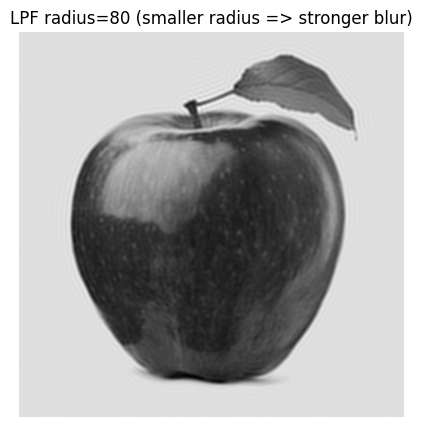

In [12]:

H, W = img.shape
crow, ccol = H//2, W//2
Y, X = np.ogrid[:H, :W]
dist2 = (Y - crow)**2 + (X - ccol)**2

def circular_lpf(radius):
    mask = np.zeros((H,W), dtype=np.float32)
    mask[dist2 <= radius**2] = 1.0
    return mask

def apply_mask_and_reconstruct(mask, fshift=fshift):

    fshift_masked = fshift * mask

    f_ishift = np.fft.ifftshift(fshift_masked)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back)
    return img_back
radii = [10, 30, 80]
recons = {}
for r in radii:
    mask = circular_lpf(r)
    recon = apply_mask_and_reconstruct(mask)
    recons[r] = recon
    print(f"Reconstructed with LPF radius {r}: min={recon.min():.2f}, max={recon.max():.2f}")

for r in radii:
    show(to_uint8(recons[r]), title=f"LPF radius={r} (smaller radius => stronger blur)")


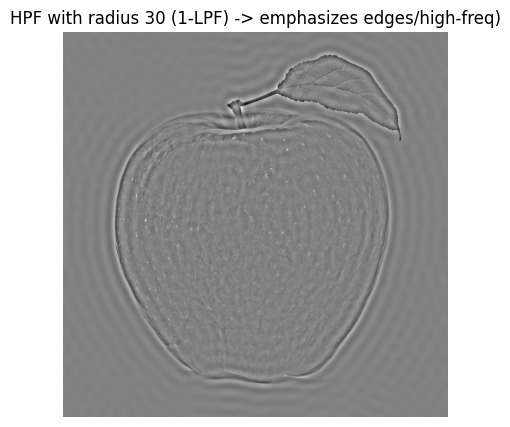

In [13]:

r_hpf = 30
hpf_mask = 1.0 - circular_lpf(r_hpf)
recon_hpf = apply_mask_and_reconstruct(hpf_mask)
show(to_uint8(recon_hpf), title=f"HPF with radius {r_hpf} (1-LPF) -> emphasizes edges/high-freq)")

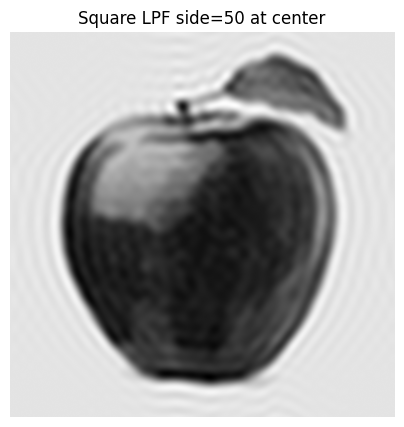

In [14]:

side = 50
mask_square = np.zeros((H,W), dtype=np.float32)
half = side // 2
mask_square[crow-half:crow+half, ccol-half:ccol+half] = 1.0
recon_square = apply_mask_and_reconstruct(mask_square)
show(to_uint8(recon_square), title=f"Square LPF side={side} at center")


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

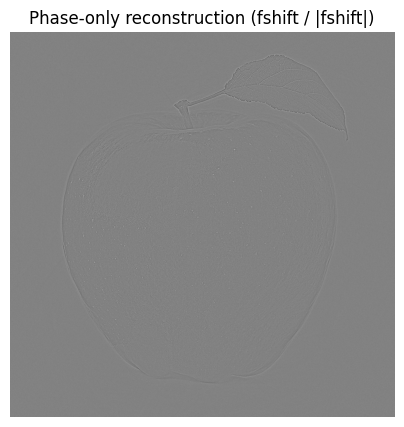

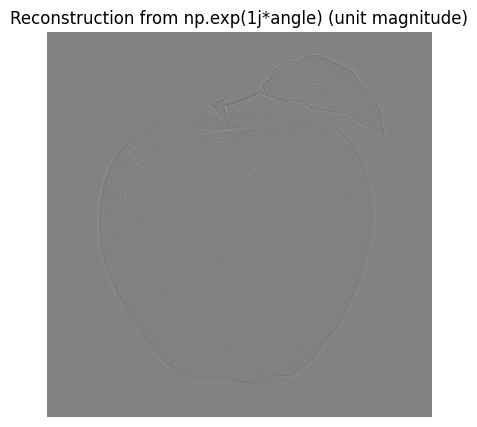

In [15]:

eps = 1e-12
phase_only = fshift / (magnitude + eps)

img_phase_only = np.real(np.fft.ifft2(np.fft.ifftshift(phase_only)))
show(to_uint8(img_phase_only), title="Phase-only reconstruction (fshift / |fshift|)")

f_from_angle = np.exp(1j * phase)
img_from_angle = np.real(np.fft.ifft2(np.fft.ifftshift(f_from_angle)))
show(to_uint8(img_from_angle), title="Reconstruction from np.exp(1j*angle) (unit magnitude)")
# Explanation
# - fshift / np.abs(fshift) gives the complex numbers with magnitude=1 and the original sign/phase for each coefficient.
# - np.exp(1j * angle) produces the same mathematical result (unit magnitude, same phase).
# - The lecture line using np.angle(f_shift) returns the phase *values* (real numbers between -pi and pi).
#   If you only use np.angle (without converting back to complex as exp(1j*angle)), you don't have complex spectrum
#   to invert with ifft2. You need to construct complex coefficients like exp(1j*angle) to do an inverse FFT.
#

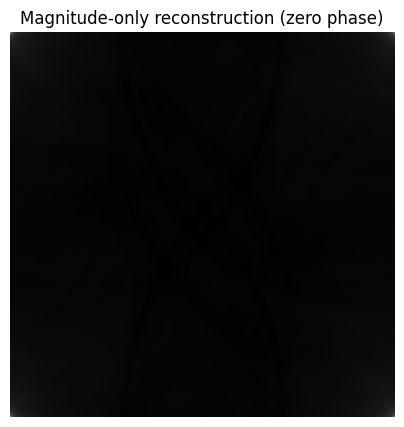

In [16]:
mag_only = magnitude.copy()
f_mag_only = mag_only
f_mag_only_complex = mag_only.astype(np.complex64)

img_mag_only = np.real(np.fft.ifft2(np.fft.ifftshift(f_mag_only_complex)))
show(to_uint8(img_mag_only), title="Magnitude-only reconstruction (zero phase)")

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

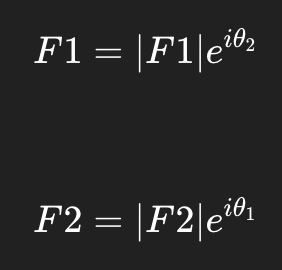

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

Loaded second image from path: /content/Ambersweet_oranges.jpg
Resized second image to match first image shape.


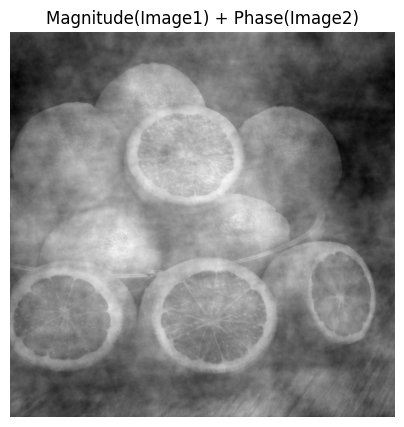

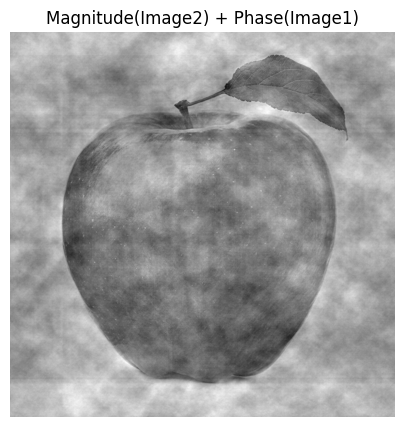

In [18]:
IMAGE_PATH2 = "/content/Ambersweet_oranges.jpg"

def load_second_image():
    if IMAGE_PATH2 and IMAGE_PATH2.strip():
        try:
            img2 = Image.open(IMAGE_PATH2).convert("RGB")
            print("Loaded second image from path:", IMAGE_PATH2)
            return np.array(img2)
        except Exception:
            pass
    if BASE64_STRING2 and BASE64_STRING2.strip():
        try:
            data = base64.b64decode(BASE64_STRING2)
            img2 = Image.open(io.BytesIO(data)).convert("RGB")
            print("Loaded second image from base64")
            return np.array(img2)
        except Exception:
            pass
    print("No second image provided; using a resized copy of the first image for demonstration.")
    return rgb.copy()

rgb2 = load_second_image()

if rgb.shape != rgb2.shape:
    pil2 = Image.fromarray(rgb2)
    pil2 = pil2.resize((rgb.shape[1], rgb.shape[0]), Image.BICUBIC)
    rgb2 = np.array(pil2)
    print("Resized second image to match first image shape.")

gray1 = np.dot(rgb.astype(np.float32), weights)
gray2 = np.dot(rgb2.astype(np.float32), weights)


F1 = np.fft.fftshift(np.fft.fft2(gray1))
F2 = np.fft.fftshift(np.fft.fft2(gray2))
M1, P1 = np.abs(F1), np.angle(F1)
M2, P2 = np.abs(F2), np.angle(F2)

F_1mag_2phase = M1 * np.exp(1j * P2)
F_2mag_1phase = M2 * np.exp(1j * P1)


img_1mag_2phase = np.real(np.fft.ifft2(np.fft.ifftshift(F_1mag_2phase)))
img_2mag_1phase = np.real(np.fft.ifft2(np.fft.ifftshift(F_2mag_1phase)))

show(to_uint8(img_1mag_2phase), title="Magnitude(Image1) + Phase(Image2)")
show(to_uint8(img_2mag_1phase), title="Magnitude(Image2) + Phase(Image1)")

# observation:
# - You'll usually observe that the image formed with the phase of image A and magnitude of image B looks much more
#   like image A in terms of structure (edges, object placement) but texture/contrast may be influenced by magnitude.
# - This demonstrates that phase encodes structural information (locations of features) while magnitude tends to carry
#   amplitude/contrast/texture information. In practice, phase often dominates perceived structure.

